<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Andrea Flores Fernández y Tania Bell Nicholls.

**Fecha:** 09 de octubre del 2021.

**Expediente** : IF725449 y IF716767.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Tania-Bell/Proyecto_TBell_AFlores.git

# Proyecto Simulación - Radiación Solar

## Descripción

> Nuestro dataset contiene las mediciones de 4 meses con diferentes variables que nos ayudan a predecir el nivel de radiación solar. Predecir la radiación solar es esencial ya que es la fuente de energía mas importante de la tierra y tiene efectos como el balance de radiación en la superficie, ciclos hidrológicos, fotosíntesis, condiciones meteorológicas y climas extremos.  



## Objetivos

> #### Objetivo General:
El objetivo es simular las condiciones climáticas que generan una alta radiación solar en base a las variables: temperatura, presión, humedad y velocidad del viento, para así poder encontrar las condiciones promedio que indican alta radiación solar. 


> #### Objetivo específico:
    > - Encontrar la correlación entre los datos.
    > - Simular escenarios en donde la radiación solar esté alta, basada en la condición climática y atmosférica, como la temperatura, la presión, la humedad y la velocidad del viento.
    > - Enunciar la temperatura media en relación a la radiación solar 
    > - Encontrar la media del porcentaje de humedad y su relación con la radiación solar 
    > - Simular la Presión atmosférica/barométrica para encontrar que cantidad se le atribuye a radiación solar.
    > - Encontrar la media de la velocidad de viento y su relación con la radiación solar. 

## Definición del Problema

>La radiación solar es importante porque provee calor, luz y energía. Estos tres elementos son vitales para los seres vivos. La radiación infraroja provee calor a todos los diferentes habitats en el mundo y sin esa radiación que proviene del sol, la superficie estaría 32 grados centígrados más frío. La luz que también proviene de la radiación solar, es vital para que los seres humanos y otros seres vivos ya que su visión no está adaptada para la oscuridad. Inclusivamente, las plantas requieren de la luz del sol para tener energía.
Todo esto nos muestra lo importante que es la radiación solar, pero a causa del calentamiento global, la radiación solar es cada vez más intensa y cada día hay más radiación de lo que necesitamos para vivir, al punto en donde ya empieza a dañarnos.
Las personas son afectadas por la radiación ultravioleta que es parte de la radiación solar. La radiación ultravioleta daña la piel de las personas, incrementando la posibilidad de cáncer de piel. La radiación ioninizante que también está incluida en la radiación solar es la que produce cambios químicos en las células y daña el ADN. Esto puede afectar negativamente a todos los tipos de seres vivos.
Esta información nos lleva a querer prevenir y poder detectar cuándo hay altos niveles de radiación solar. Los meteorólogos han encontrado una conexión entre las condiciones meteorológicas y el nivel de radiación solar. Queremos encontrar esta conexión para simular estos eventos y poder determinar el nivel de radiación y por ende poder dar recomendaciones al encontrarse en esas condiciones. Podemos dar recomendaciones a las personas cuando están las condiciones que generan un alto nivel de radación y decirles que se protejan de la radiación, aún más, cuando se encuentran en dichas condiciones. De esta manera podemos intentar prevenir los efectos negativos de la radiación solar.

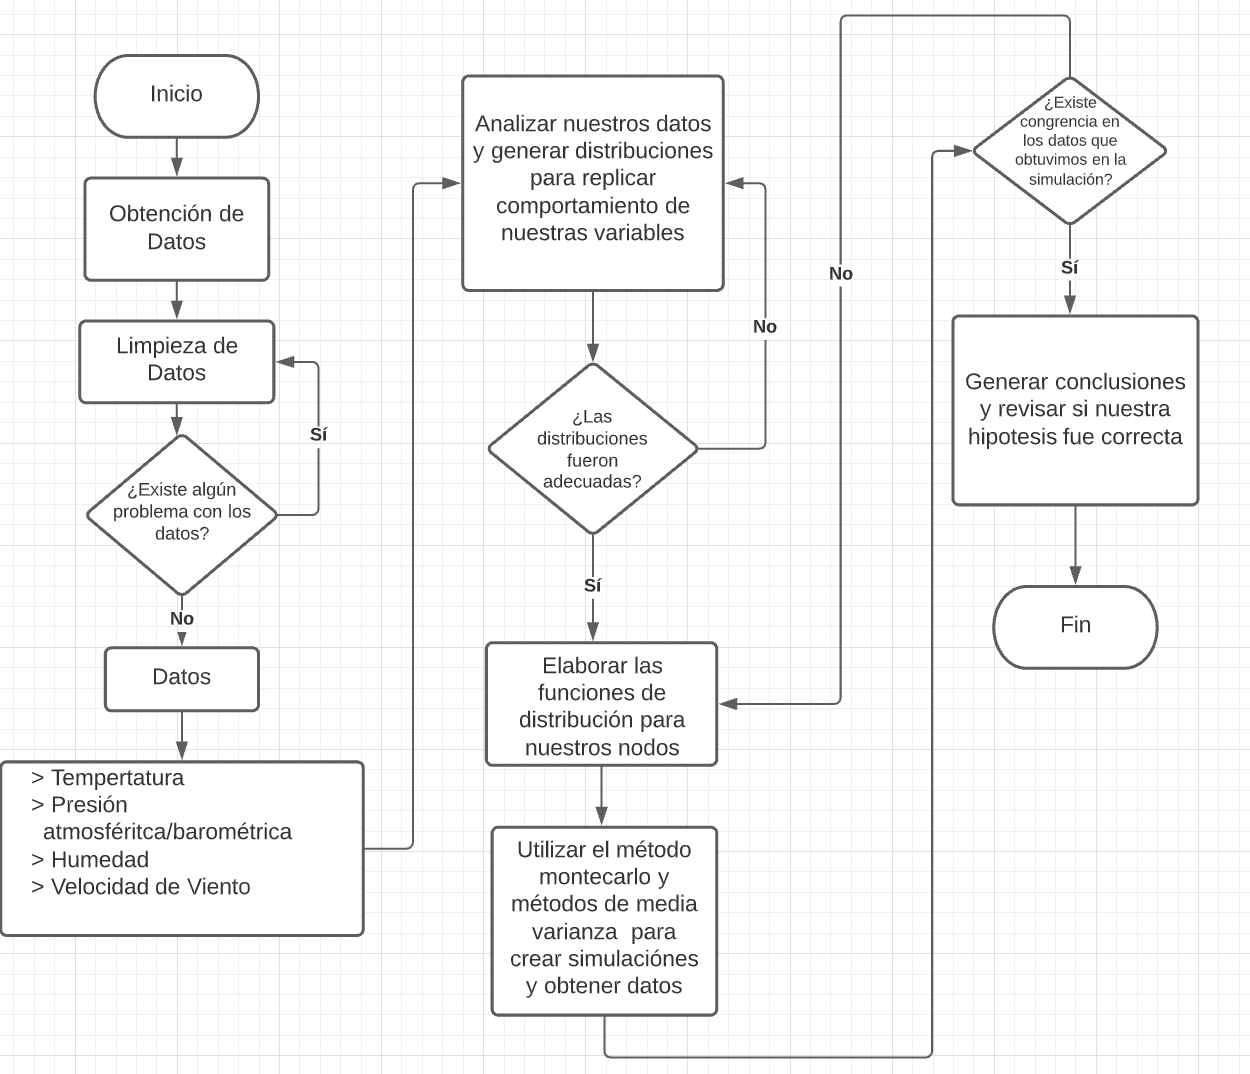

## Nodos y variables que se decidieron simular y por qué

>Para desarrollar el proyecto tomamos las siguientes variables de datos meteorológicos:
    > - Temperatura: dada en grados Fahrenheit, mide el grado de caliente o frío relativo.
    > - Presión atmosférica/barométrica: dada enpulgada de mercurio (Hg), mide la fuerza por unidad de superficie que ejerce el aire que forma la atmósfera sobre la superficie terrestre.
    > - Humedad: dada en porcentaje, mide el vapor de agua contenido en la atmósfera.
    > - Velocidad del viento: dada en millas por hora, mide la componente horizontal del desplazamiento del aire.

>Nuestra variable objetivo es la radiación solar. Esta se mide en watts por metro cuadrado y es la radiación electromagnética procedente del Sol. Seleccionamos nuestros nodos ya que es conocido que las condiciones meterológicas afectan el nivel de radiación solar que recibe la superficie de la tierra. Al obtener datos meteorológicos, esto nos permite identificar en qué condiciones se da la radiación alta y por ende poder simular los escenarios para predecir el nivel de radiación.

## Obtención de bases de datos

> Nuestro dataset fue proporcionado por la NASA y lo obtuvimos de una publicación en Kaggle 

> https://www.kaggle.com/dronio/SolarEnergy/version/1

## Definición de hipótesis y supuestos



#### Supuestos

- Los datos fueron medidos correctamente y con la misma precisión.
- Con los datos proporcionados, es posible analizarlos para encontrar su correlación y sus distribuciones
- Los cuatro nodos son suficientes para predecir el nivel de radiación solar
- Los datos


#### Hipótesis 
- Usando los cuatro nodos seleccionados y a través de la simulación podemos predecir el promedio de condiciones que se relacionan con una alta radiación solar. 

## Librerías y Funciones

In [1]:
# importación de las librerías
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.api as sm 
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from sklearn.model_selection import GridSearchCV
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import warnings
warnings.filterwarnings("ignore")

In [2]:
def histograma(dataset:'Dataset',
               datos:'Nodo',
               title:'Titulo de grafica',
               bin:'Numero de bins'):
    '''
    Funcion que genera el histograma de datos proporcionados y numero de bins dados
    '''
    plt.figure(figsize=(7,4))
    plt.hist(dataset[datos], bins = bin, density=True);
    plt.title(title);

def boxplot(data:'Nodo',
           title:'Titulo de grafica'):
    '''
    Funcion que genera el boxplot de datos proporcionados
    '''
    plt.boxplot(data,vert=False)
    plt.title(title)
    plt.show()

def kde_statsmodels_m(x, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          #bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

def distribuciones(datos: 'Nodo'):
    '''
    Funcion que obtiene las sidtribuciones continuas y los parametros que mejor se ajustan a los datos
    '''
    y,x,_ = plt.hist(datos,bins=50,density=True)
    x = x[1:]
    rv_continuas = [d for d in dir(st) if isinstance(getattr(st,d),getattr(st,'rv_continuous'))]
    rv_continuas = rv_continuas[20:30] + ["norm"]
    error = pd.DataFrame(index = rv_continuas, columns=["error"])
    for d in rv_continuas:
        params = getattr(st,d).fit(datos)
        y_hat = getattr(st,d)(*params).pdf(x)
        error.loc[d] = ((y - y_hat)**2).mean()
    menor_error = error.sort_values(by="error")
    menor_error = menor_error[0:5]
    dists_menor_error = menor_error.index
    distribucion_menor_error = []
    parametros = []
    for d in dists_menor_error:
        distribucion_menor_error.append(getattr(st,d))
        params = getattr(st,d).fit(datos)
        y_hat = getattr(st,d)(*params).pdf(x)
        parametros.append(params)
        plt.plot(x,y_hat,label=d)
    plt.legend()
    return distribucion_menor_error[0], parametros[0]
def pruebaq_q(data:'Nodo', 
              dist:'Distribución óptima'):
    '''
    Prueba Q_Q, genera gráfica con la distribución y la gráfica Q_Q (45 grados)
    '''
    # Histograma de las variables creadas
    fig, ax = plt.subplots(2,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)
    # distribuciones y prueba
    y, x, _ = ax[0].hist(data, 50, density=True, label='Histograma')
    params = getattr(st, dist).fit(data)
    y_hat = getattr(st, dist).pdf(x, *params) # usando probability distribution function
    # creación de gráficas
    ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
    ax[0].set_ylabel('Probabilidad')
    ax[0].grid()
    grafica = st.probplot(data, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
    ax[1].grid()
    ax[1].set_title(dist)
    plt.show()
    
def red_var(data:'Nodo', N:'Número para muestra',f:'Pdf', t:'Función lambda', model:'Model'):
    '''
    Reducción de Varianza, retorna las variables aceptadas
    '''
    # parámetros y generación de variables
    r1 = muestra_est(N) # usando función del muestreo estratificado
    np.random.shuffle(r1)
    ct = 0
    i = 0
    var_acept = np.zeros(1000)
    # iteración de aceptación o rechazo
    while ct < 1000:    
        r = np.random.uniform(min(data), max(data), 1)
        f_x = f(r, model)
        t_x = t(r)
        condition = r1[i] * t_x <= f_x
        if condition[0]:
            var_acept[ct] = r[0]
            ct += 1
        i+=1
    return var_acept

def pdf(x:'x_grid, intervalo', model:'Model'):
    '''
    Pdf para reducción de varianza
    '''
    return np.exp(model.score_samples(x.reshape(-1, 1)))

def muestra_est(n:'Número de muestras'):
    '''
    Muestreo Estratificado
    '''
    # generación de variables aleatorias entre 0 y 1
    u = np.random.uniform(0, 1, n)
    i = np.arange(0, n)
    return (u + i) / n

def kolmogorov(data:'Nodo',dist:'Distribución Óptima'):
    '''
    Prueba Kolmogorov-Smirnov
    '''
    param = getattr(st, dist).fit(data)
    return st.kstest(data, dist, args = (param))

def chi_cuadrada(dist:'Distribución Óptima', data:'Nodo', x:'x', y:'y', c:'Confianza',param:'Parametros'):
    '''
    Prueba de Chi cuadrada, genera el teórico, el de la librería, el estadístico y arroja media y desviación estándar
    '''
    # parámetros
    J1 = len(x)
    pi = dist.pdf(x,*param)
   
    Ei = x*pi

    x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y))) # teórico
    print('Chi cuadrado teórico: ', x2)

    X2 = st.chisquare(y, Ei) # usando librería scipy.stats
    print('Chi cuadrado stats: ', X2)

    m = J1-1 
    
    Chi_est = st.chi2.ppf(q=c, df=m) # estadístico
    print('Estadístico de chi_cuadrado: ', Chi_est)
    
    mu = np.mean(x) # media
    sigma = np.std(x) # desviación estándar
    print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)
    

    #Prueba de intervalos de confianza
def intervalo_confianza(X:'variable a probar',
                        confianza:'Intervalo de confianza'):
    '''
    Función que realiza la prueba de intervalo de confianza por medio de aceptar o rechazar una hipótesis nula
    '''
    N = len(X)
    i1 = st.t.interval(confianza, len(X)-1, loc=np.mean(X), scale=st.sem(X))
    i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
    media = np.mean(X)
    h_0 = st.ttest_1samp(X, media) # prueba de hipotesis nula para media de montecarlo = media de datos originales
    est = (np.mean(X) - media)/(np.std(X) / np.sqrt(N)) # estadístico normalizado
    cuantil = st.t(N-1).cdf(confianza/2) # rechazo
    print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
    print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
    print('Media calculada' ,np.mean(X))
    if h_0.pvalue > confianza:
        print("La media es",media,"con un",confianza,"% de confianza, por lo tanto se acepta la hipótesis nula.")
    else:
        print("La media es diferente de",media,"por lo tanto se rechaza la hipótesis nula.")

In [3]:
# importación de los datos, el archivo está en un csv y se llama adult
data = pd.read_csv('SolarPrediction.csv')
#data = data[['age','educational-num','capital-gain','hours-per-week']].head(20001)
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


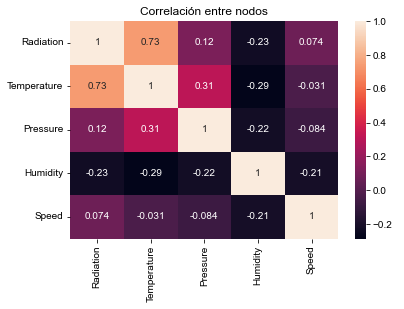

In [4]:
# análisis de correlación entre los datos
corrMatrix = data.drop(['UNIXTime','WindDirection(Degrees)'],axis=1).corr()
sn.heatmap(corrMatrix, annot=True, linewidths=.0001)
sn.set(rc = {'figure.figsize':(5,5)})
plt.title('Correlación entre nodos') # generación de tabla
plt.show()

#### Interpretación: 
La correlación entre la velocidad del viento y la radiación es muy pequeña. Hay una correlación pequeña pero negativa entre la radiación y la humedad. Esto siginifica que cuando la humedad aumenta, la radiación disminuye, y vice versa. Hay una correlación un poco más fuerte entre la presión atmosférica y la radiación. Pero la correlación más significativa es la de la temperatura y la radiación solar. Esto nos indica que podremos predecir la radiación basándonos en la temperatura, por la mayor parte.

## Visualización de Variables

Para generar una idea general de nuestros datos, los visualizaremos usando histogramas. Nos mostrará, a primera vista, si hay una distribución obvia en nuestros nodos.

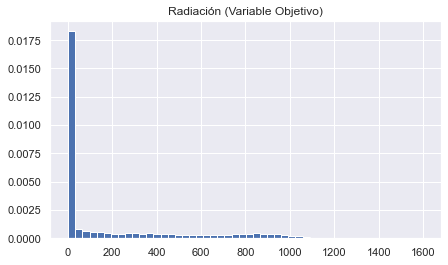

In [5]:
# histograma para visualizar objetivo: la Radiación 
histograma(data,'Radiation','Radiación (Variable Objetivo)',50)

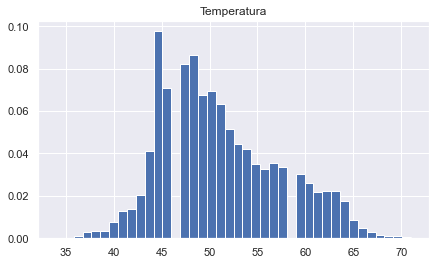

In [6]:
# histograma para visualizar la variable temperatura
histograma(data,'Temperature','Temperatura',40)

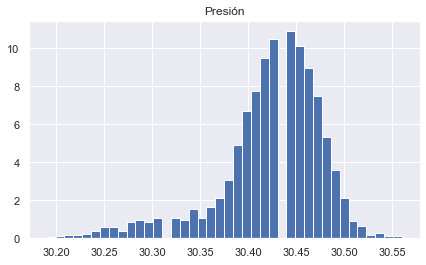

In [7]:
# histograma con 40 bins para visualizar la variable presión 
histograma(data,'Pressure','Presión',40)

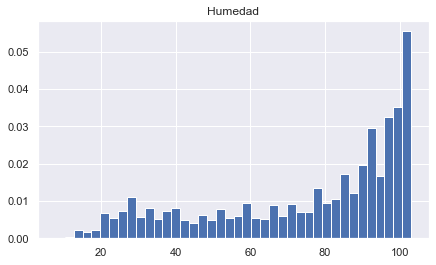

In [8]:
# histograma para visualizar la variable humedad 
histograma(data,'Humidity','Humedad',40)

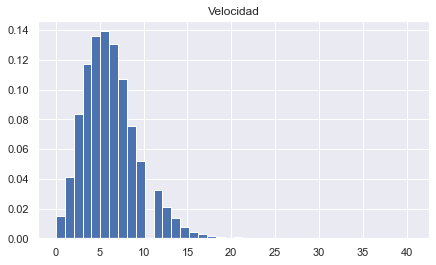

In [9]:
# histograma para visualizar la variable velocidad
histograma(data,'Speed','Velocidad',40)

## Procedimiento de la simulación:

>Primero, generaremos box-plots para visualizar los outliers y poderlos eliminar para tener datos más uniformes. Luego, implementaremos algunos métodos como logaritmo o raíz cuadrada para ajustar los datos. Como tercer paso, encontraremos el bandwidth adecuado para cada nodo y posteriormente realizaremos el método de KDE usando la librería Scikit-learn. Después realizaremos el método de reducción de varianza usando aceptación y rechazo. Luego simularemos con varias distribuciones para ver cuál es la más adecuada para cada nodo. Usando la distribución con menor error, realizaremos la prueba Q_Q, kolmogorov y chi cuadrada. 

## Nodo 1: Temperatura 

#### Box-Plots y Ajuste de datos

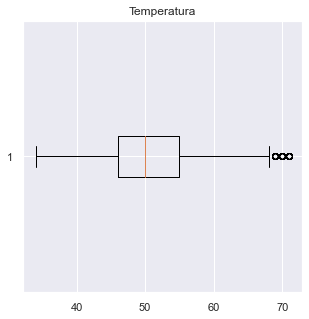

In [10]:
temp = np.array(data['Temperature'])
boxplot(temp,'Temperatura') #mostramos boxplot e identificamos outliers 

#### KDE

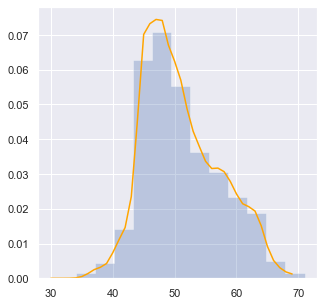

In [11]:
x_grid = np.arange(30,70)
kde = kde_statsmodels_m(temp)
plt.plot(x_grid, kde(x_grid),c='orange')
plt.hist(temp, bins=12, fc='b', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#### Distribuciones

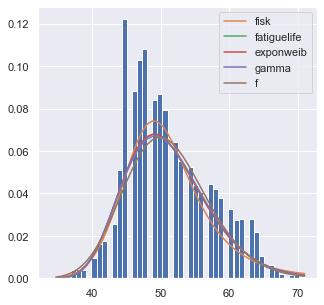

In [12]:
distribucion, params = distribuciones(temp)

#### Prueba Q_Q

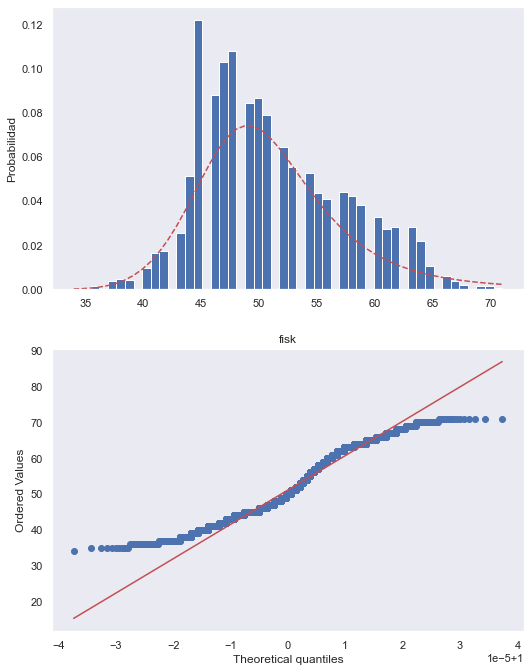

In [13]:
pruebaq_q(temp,'fisk') # llama la función para hacer la prueba de 45 grados 

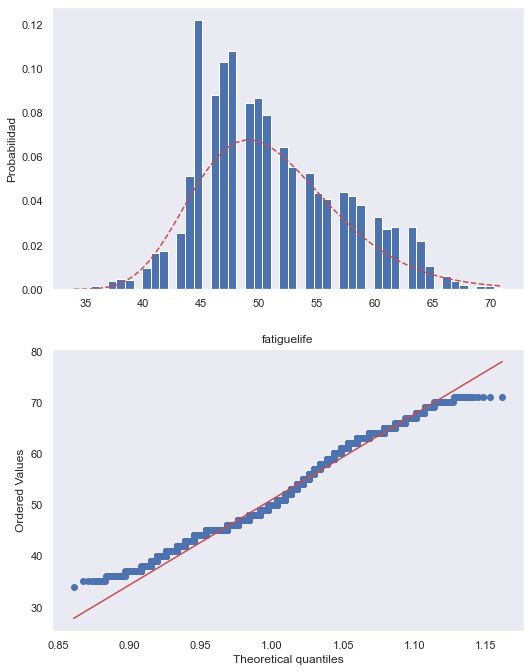

In [14]:
pruebaq_q(temp,'fatiguelife') # llama la función para hacer la prueba de 45 grados 

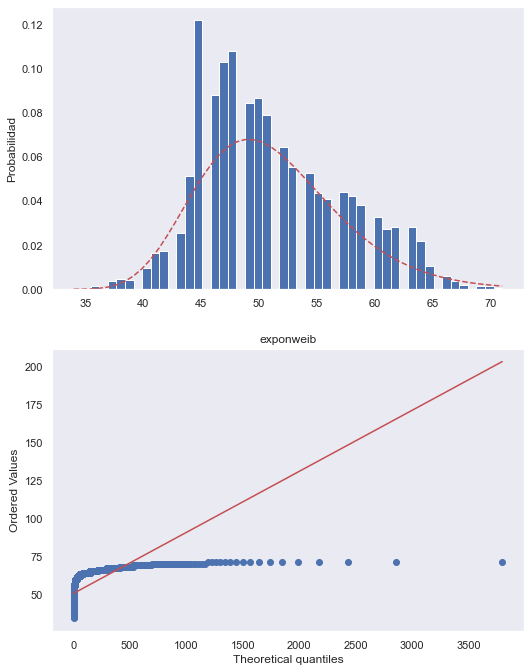

In [15]:
pruebaq_q(temp,'exponweib') # llama la función para hacer la prueba de 45 grados 

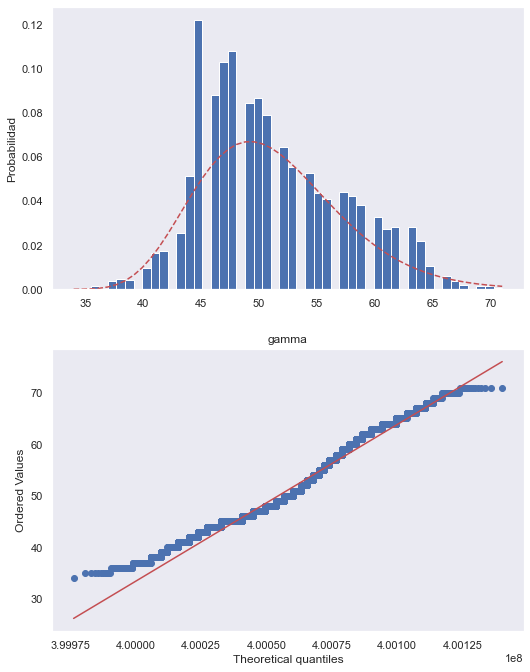

In [16]:
pruebaq_q(temp,'gamma') # llama la función para hacer la prueba de 45 grados 

#### Prueba Kolmogorov-Smirnov

In [17]:
kolmogorov(temp,'fisk') # hacemos prueba de kolmogrov 

KstestResult(statistic=0.07267499101612213, pvalue=1.427658237335528e-150)

In [18]:
kolmogorov(temp,'fatiguelife') # hacemos prueba de kolmogrov 

KstestResult(statistic=0.07422492837844252, pvalue=4.726000019039795e-157)

In [19]:
kolmogorov(temp,'gamma') # hacemos prueba de kolmogrov 

KstestResult(statistic=0.07572264732191525, pvalue=1.914851128060736e-163)

#### Prueba Chi Cuadrada

Chi cuadrado teórico:  38.96593307173556
Chi cuadrado stats:  Power_divergenceResult(statistic=38.96593307173556, pvalue=0.10231821295845939)
Estadístico de chi_cuadrado:  42.55696780429269
Media muestral =  53.11666666666666 
Desviación estándar muestral =  10.675044453025668


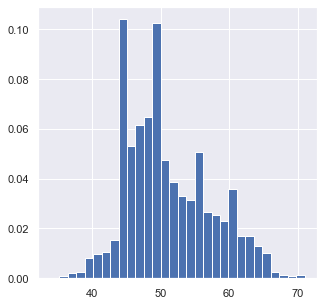

In [20]:
J1 = 30
y, x, _ = plt.hist(temp, bins = J1, density = True)
x = x[1:]
chi_cuadrada(distribucion,temp,x,y,0.95,params) # aplicamos la prueba de chi cuadrada 

Se acepta la hipotesis nula

#### Reducción de Varianza: Transformada inversa

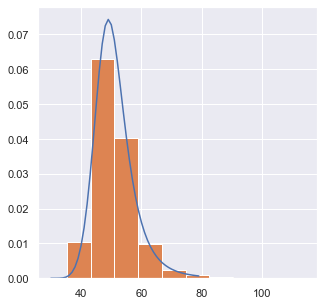

In [21]:
#encontramos parametros que se ajustan a nuestros datos
var_aleatorias_ti = distribucion.rvs(*params,1000)
plt.plot(np.arange(30,80),distribucion(*params).pdf(np.arange(30,80)))
plt.hist(var_aleatorias_ti,density=True);

#### Reducción de Varianza: Muestreo estratificado

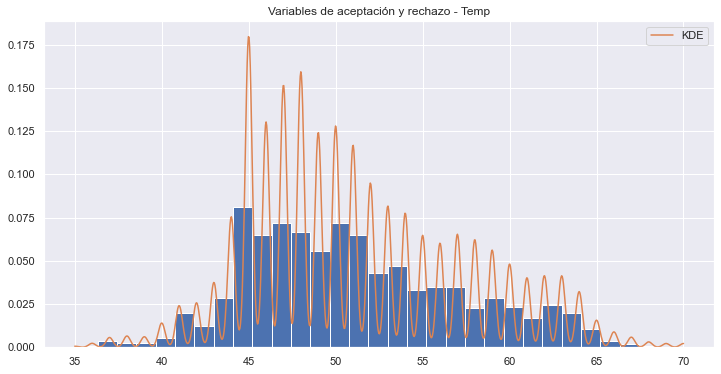

In [22]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(temp.reshape(-1, 1))
x_grid = np.linspace(35, 70, 1000)
pdf_temp = pdf(x_grid[:, None], model) # usando función pdf

plt.figure(figsize=(12,6))
var_aleatorias_me = red_var(temp,100000,pdf, lambda x: max(pdf_temp) * np.ones(len(x)), model) # usand pdf
plt.hist(var_aleatorias_me, 30, density=True)

plt.plot(x_grid, pdf_temp, alpha=1, label='KDE') # graficamos
plt.title('Variables de aceptación y rechazo - Temp')
plt.legend()
plt.show()

#### Montecarlo: Media

In [24]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(temp.reshape(-1, 1))
x_grid = np.linspace(35, 70, 10)
pdf_temp = pdf(x_grid[:, None], model) # usando función pdf

montecarlo = [red_var(temp,10000,pdf, lambda x: max(pdf_temp) * np.ones(len(x)), model).mean() for i in range(100)] # usand pdf

In [25]:
media_temp_montecarlo = np.mean(montecarlo)
media_temp_montecarlo

52.24965592509616

#### Intervalo de confianza para la media

In [26]:
# reduccion de varianza transformada inversa
intervalo_confianza(var_aleatorias_ti,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (50.57455284295693, 51.4361459800588)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (50.575074774933874, 51.435624048081856)
Media calculada 51.005349411507865
La media es 51.005349411507865 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


In [27]:
# reduccion de varianza muestreo estratificado
intervalo_confianza(var_aleatorias_me,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (50.68716301140421, 51.43970897348157)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (50.687618885278795, 51.43925309960699)
Media calculada 51.06343599244289
La media es 51.06343599244289 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


## Conclusión Nodo 1: 
Para este nodo no fue necesario ningún ajuste, con el KDE tuvimos un buen ajuste ya que podemos ver en el histograma se ajusto bien. La mejor distribución fue Fisk de acuerdo a las distribuciones continuas. Lo verificamos con la prueba de cuantil cuantil, visualmente la mejor distribución fue Fisk y Fatigue Life. Luego basado en la prueba de kolmogrov-Smirnov fue fatigue Life, aunque en todas se rechaza la hipótesis nula. Luego verificamos la distribución que usamos para nuestra reducción de varianza por medio de la prueba de chi cuadrada, con un 95% de intervalo de confianza obtuvimos el chi cuadrado es 38.9, el estadístico es 42.55 y nuestra media muestra es 10.67. Nuestro pvalue es mayor .05 por lo que aceptamos la hipotesis nula. En la reducción de varianza obtuvimos una muy buena distribución cuando realizamos la transformada inversa, pero en muestreo estratificado no obtuvimos el resultado que queríamos visualmente, pero usamos la media de ambas para obtener el intervalo de confianza. Obtuvimos que la media calculada era 51, la esta dentro del intervalo de confianza por lo que se acepta la hipótesis nula y podemos usar temperatura. 

## Nodo 2: Presión

#### Box-Plots y Ajuste de datos

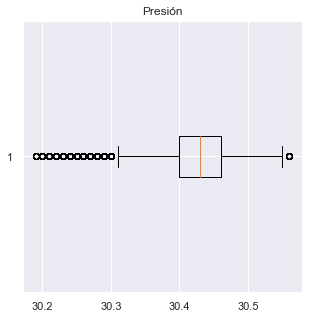

In [28]:
pres = np.array(data['Pressure'])
boxplot(pres,'Presión') # sacamos boxplot para ver la distribución de nuestros datos

In [29]:
# normalizamos datos con standard score ya que con logaritmo y sqrt no tuvimos los resultados que queríamos
pres_std = pres.std()
pres_mean = pres.mean()
pres = (pres-pres_mean)/pres_std
pres = pres[~np.isnan(pres)]
pres # aplicamos una transformación de raiz cuadrada para mejorar la distribución de nuestros datos

array([ 0.67897416,  0.67897416,  0.67897416, ..., -0.05265751,
       -0.05265751,  0.1302504 ])

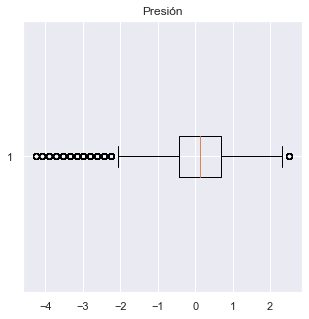

In [30]:
boxplot(pres,'Presión') 

#### KDE

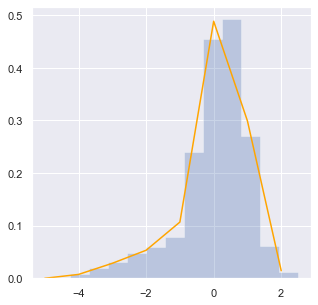

In [31]:
x_grid = np.arange(-5,3)
kde = kde_statsmodels_m(pres)
plt.plot(x_grid, kde(x_grid),c='orange')
plt.hist(pres, bins=12, fc='b', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#### Distribuciones

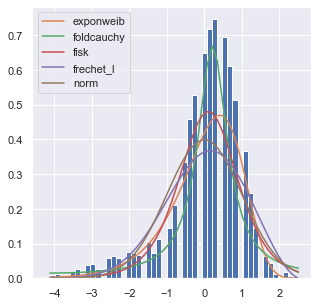

In [32]:
distribucion, params = distribuciones(pres)

#### Prueba Q_Q

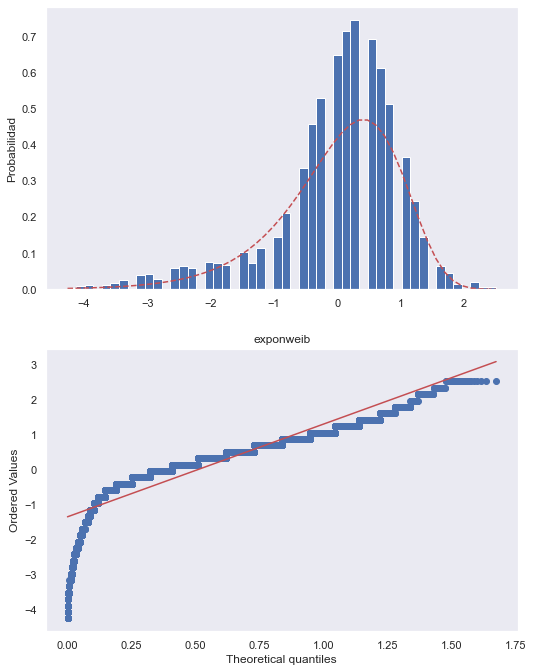

In [33]:
pruebaq_q(pres,'exponweib') # probamos las mejores distribuciones con la prueba q_q

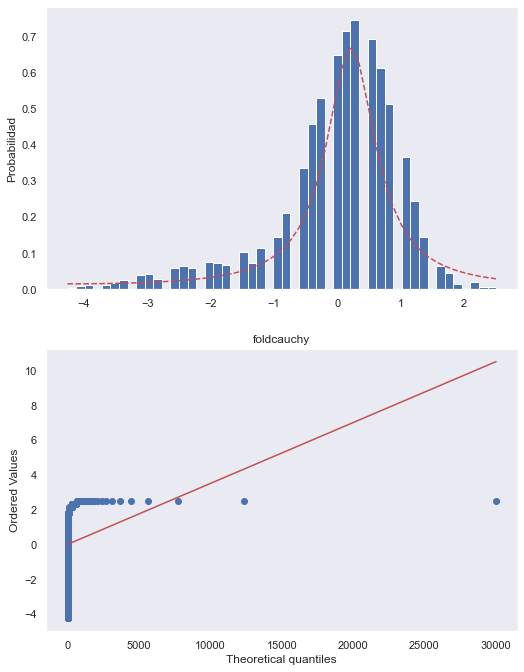

In [34]:
pruebaq_q(pres,'foldcauchy') # probamos las mejores distribuciones con la prueba q_q

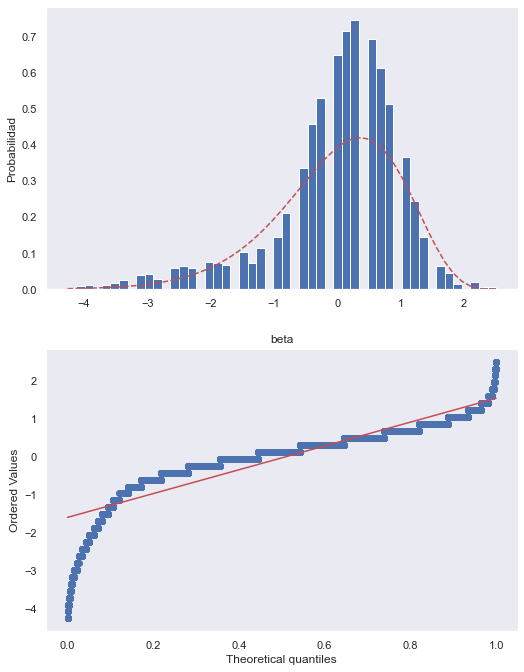

In [35]:
pruebaq_q(pres,'beta') # probamos las mejores distribuciones con la prueba q_q

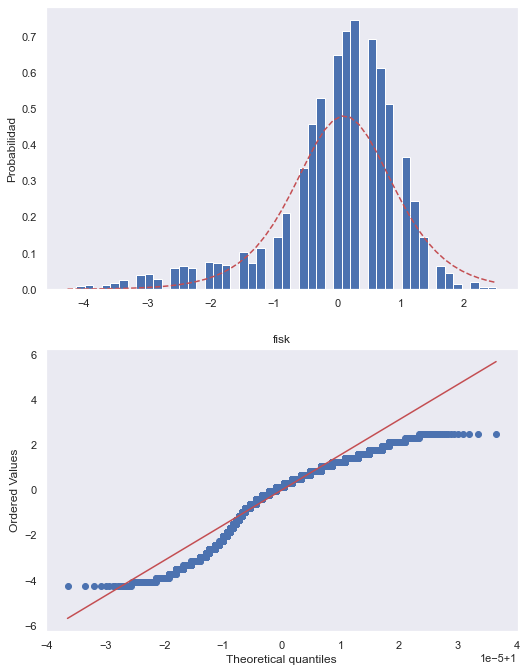

In [36]:
pruebaq_q(pres,'fisk') # probamos las mejores distribuciones con la prueba q_q

#### Prueba Kolmogorov-Smirnov

In [37]:
kolmogorov(pres,'exponweib') # prueba de kolmogrov 

KstestResult(statistic=0.06942032140862103, pvalue=2.065441850000042e-137)

In [38]:
kolmogorov(pres,'beta') # prueba de kolmogrov 

KstestResult(statistic=0.09418408139721213, pvalue=8.5682234774786e-253)

In [39]:
kolmogorov(pres,'f') # prueba de kolmogrov 

KstestResult(statistic=0.42895383062245357, pvalue=0.0)

#### Prueba Chi Cuadrada

Chi cuadrado teórico:  5.111186855989708
Chi cuadrado stats:  Power_divergenceResult(statistic=5.111186855989708, pvalue=0.9999997755153669)
Estadístico de chi_cuadrado:  42.55696780429269
Media muestral =  -0.7629499299139515 
Desviación estándar muestral =  1.9525501576031037


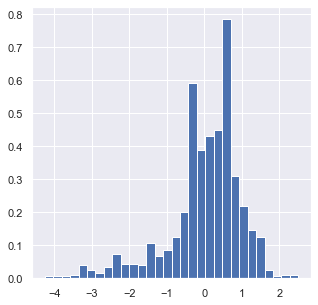

In [40]:
J1 = 30
y, x, _ = plt.hist(pres, bins = J1, density = True)
x = x[1:]
chi_cuadrada(distribucion,pres,x,y,0.95,params) # prueba de chicuadrada 

Se acepta la hipotesis nula

#### Reducción de Varianza: Transformada inversa

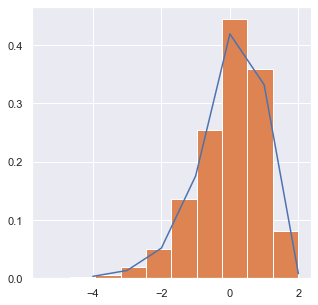

In [41]:
#encontramos parametros que se ajustan a nuestros datos
var_aleatorias_ti = distribucion.rvs(*params,1000)
plt.plot(np.arange(-4,3),distribucion(*params).pdf(np.arange(-4,3)))
plt.hist(var_aleatorias_ti,density=True);

#### Reducción de Varianza: Muestreo estratificado

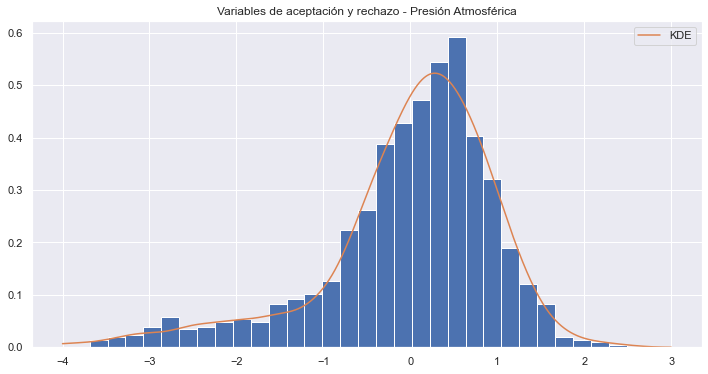

In [42]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(pres.reshape(-1, 1))
x_grid = np.linspace(-4, 3, 1000)
pdf_pres = pdf(x_grid[:, None], model) # usando función pdf

plt.figure(figsize=(12,6))
var_aleatorias_me = red_var(pres,100000,pdf, lambda x: max(pdf_pres) * np.ones(len(x)), model) # usand pdf

plt.hist(var_aleatorias_me, 30, density=True)

plt.plot(x_grid, pdf_pres, alpha=1, label='KDE') # graficamos
plt.title('Variables de aceptación y rechazo - Presión Atmosférica')
plt.legend()
plt.show()

#### Montecarlo: Media

In [43]:
# quitamos el ajuste de nuestros datos para poder simular
pres = (pres*pres_std)+pres_mean

model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(pres.reshape(-1, 1))
x_grid = np.linspace(-4, 3, 10)
pdf_pres = pdf(x_grid[:, None], model) # usando función pdf

montecarlo = [red_var(pres,10000,pdf, lambda x: max(pdf_temp) * np.ones(len(x)), model).mean() for i in range(100)] # usand pdf

In [44]:
np.mean(montecarlo)

30.374471191068206

#### Intervalo de confianza para la media

In [45]:
# reduccion de varianza transforamada inversa
intervalo_confianza(var_aleatorias_ti,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (-0.08110626826215042, 0.03958522959492723)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (-0.08103315631480075, 0.03951211764757756)
Media calculada -0.020760519333611598
La media es -0.020760519333611598 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


In [46]:
# reduccion de varianza muestreo estratificado
intervalo_confianza(var_aleatorias_ti,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (-0.08110626826215042, 0.03958522959492723)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (-0.08103315631480075, 0.03951211764757756)
Media calculada -0.020760519333611598
La media es -0.020760519333611598 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


## Conclusión Nodo 2

Para este nodo fue necesario hacer un ajuste de standard score para que pudiéramos trabajar con los datos, ya que cuando hicimos el histograma density = true nos dimos cuenta que era necesario. El KDE se ajustó bien basado en nuestro histograma. La mejor distribución fue exponweib de acuerdo a las distribuciones continuas. Lo verificamos con la prueba de cuantil cuantil, visualmente la mejor distribución fueron  expoinweb y beta. Luego basado en la prueba de kolmogrov-Smirnov se rechaza la hipótesis nula en todas. Pero luego verificamos la distribución que usamos para nuestra reducción de varianza por medio de la prueba de chi cuadrada, con un 95% de intervalo de confianza obtuvimos el chi cuadrado es 5.1, el estadístico es 42.55 y nuestra media muestral es -0.76 Nuestro pvalue es mayor .05 por lo que aceptamos la hipotesis nula. En la reducción de varianza obtuvimos una buena distribución cuando realizamos el muestreo estratificado y en la transformada inversa. Para sacar la media real de los datos por el método de montecarlo, revertimos el ajuste de datos realizado con standard score. Después con los métodos de reducción de varianza y los datos ajustados obtenemos una media de -.02 la cual esta dentro del intervalo de confianza por lo que podemos usar este variable. 

## Nodo 3: Humedad 

#### Box-Plots y Ajuste de datos

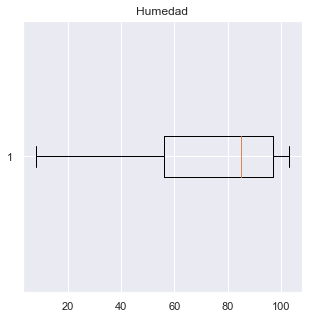

In [47]:
hume = np.array(data['Humidity'])
boxplot(hume,'Humedad') # mostramos boxplot de datos para ver si hay muchos outliers

#### KDE

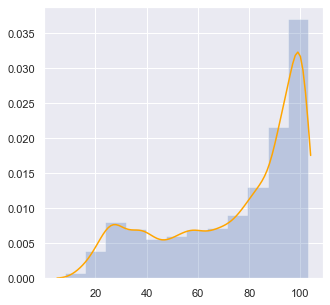

In [48]:
x_grid = np.arange(5,105)
kde = kde_statsmodels_m(hume)
plt.plot(x_grid, kde(x_grid),c='orange')
plt.hist(hume, bins=12, fc='b', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#### Distribuciones

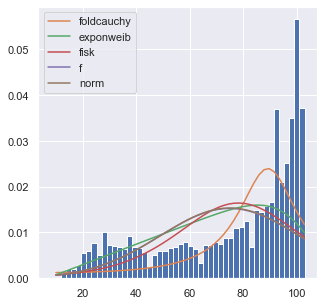

In [49]:
distribucion, params = distribuciones(hume) 

#### Prueba Q_Q

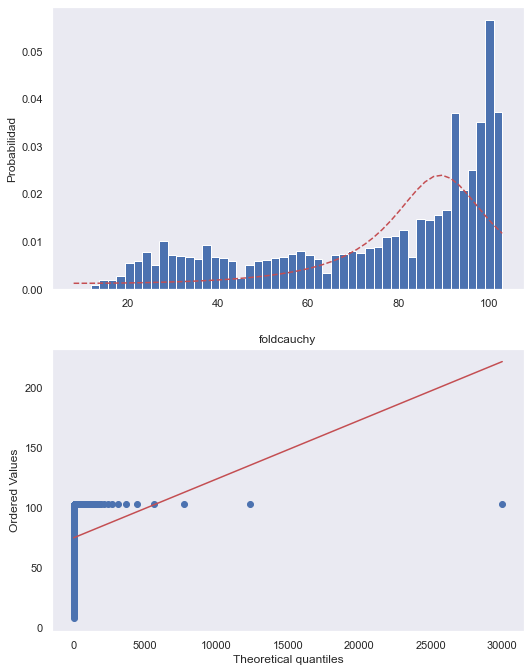

In [50]:
pruebaq_q(hume,'foldcauchy')

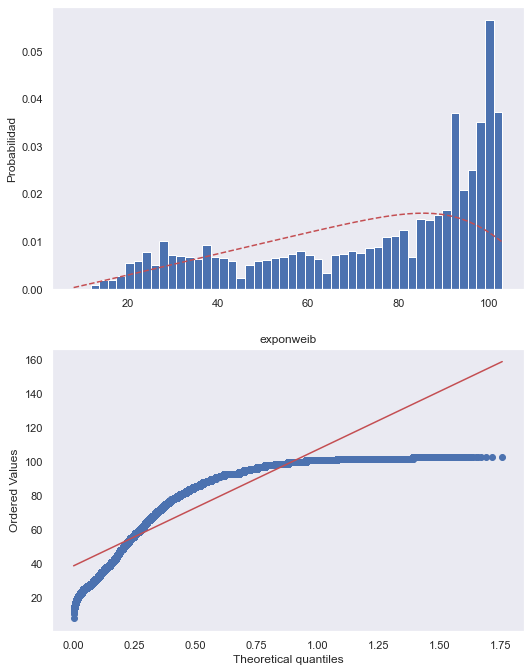

In [51]:
pruebaq_q(hume,'exponweib')

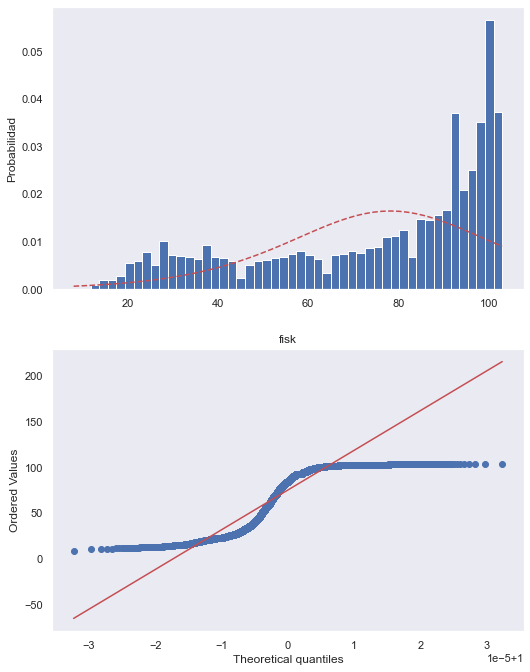

In [52]:
pruebaq_q(hume,'fisk')

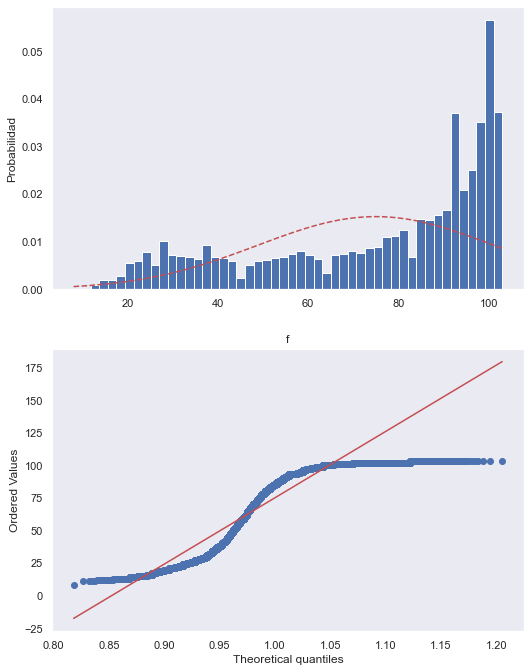

In [53]:
pruebaq_q(hume,'f')

#### Prueba Kolmogorov-Smirnov

In [54]:
kolmogorov(hume,'exponweib') # prueba de kolmogrov 

KstestResult(statistic=0.18979415242849074, pvalue=0.0)

In [55]:
kolmogorov(hume,'fisk') # prueba de kolmogrov 

KstestResult(statistic=0.16688009812313076, pvalue=0.0)

In [56]:
kolmogorov(hume,'f') # prueba de kolmogrov 

KstestResult(statistic=0.15486908188528026, pvalue=0.0)

#### Prueba Chi Cuadradra

Chi cuadrado teórico:  18.183635894295747
Chi cuadrado stats:  Power_divergenceResult(statistic=18.183635894295747, pvalue=0.9404442324290616)
Estadístico de chi_cuadrado:  42.55696780429269
Media muestral =  57.083333333333336 
Desviación estándar muestral =  27.408897919930766


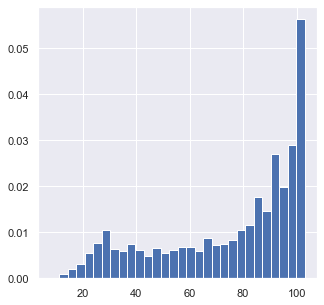

In [57]:
J1 = 30
y, x, _ = plt.hist(hume, bins = J1, density = True)
x = x[1:]
chi_cuadrada(distribucion,hume,x,y,0.95,params) # prueba de chicuadrada 

#### Reducción de Varianza: Transformada inversa

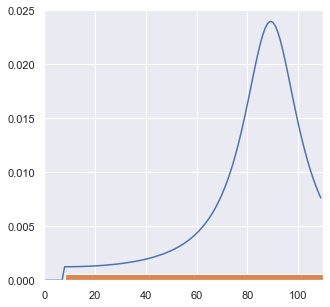

In [58]:
#encontramos parametros que se ajustan a nuestros datos
var_aleatorias_ti = distribucion.rvs(*params,1000)
plt.plot(np.arange(0,110),distribucion(*params).pdf(np.arange(0,110)))
plt.hist(var_aleatorias_ti,density=True);
plt.xlim(0,110);

#### Reducción de Varianza: Muestreo estratificado

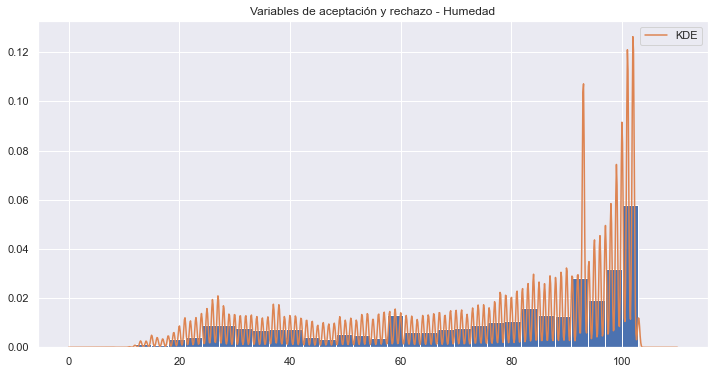

In [59]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(hume.reshape(-1, 1))
x_grid = np.linspace(0, 110, 1000)
pdf_hume = pdf(x_grid[:, None], model) # usando función pdf

plt.figure(figsize=(12,6))
var_aleatorias = red_var(hume,100000,pdf, lambda x: max(pdf_hume) * np.ones(len(x)), model) # usand pdf

plt.hist(var_aleatorias, 30, density=True)

plt.plot(x_grid, pdf_hume, alpha=1, label='KDE') # graficamos
plt.title('Variables de aceptación y rechazo - Humedad')
plt.legend()
plt.show()

#### Montecarlo: Media

In [60]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(hume.reshape(-1, 1))
x_grid = np.linspace(0, 110, 10)
pdf_hume = pdf(x_grid[:, None], model) # usando función pdf

montecarlo = [red_var(hume,10000,pdf, lambda x: max(pdf_hume) * np.ones(len(x)), model).mean() for i in range(100)] # usand pdf

In [61]:
np.mean(montecarlo)

70.59258686254395

#### Intervalo de confianza para la media

In [62]:
# reduccion de varianza transforamada inversa
intervalo_confianza(var_aleatorias_ti,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (119.35842142588027, 211.92901488763343)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (119.41449841950015, 211.87293789401355)
Media calculada 165.64371815675685
La media es 165.64371815675685 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


In [63]:
# reduccion de varianza muestreo estratificado
intervalo_confianza(var_aleatorias_me,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (-0.08040102229452029, 0.0433182619997534)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (-0.08032607618845594, 0.043243315893689044)
Media calculada -0.018541380147383445
La media es -0.018541380147383445 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


## Conclusión Nodo 3

Para este nodo no fue necesaria ningún ajuste, con el KDE tuvimos un buen ajuste ya que podemos ver en el histograma se ajusto bien. La mejor distribución fue Foldcauchy de acuerdo a las distribuciones continuas. Lo verificamos con la prueba de cuantil cuantil, visualmente la mejor distribución fue Fisk. Luego basado en la prueba de kolmogrov-Smirnov se rechaza la hipótesis nula en todas. Pero luego verificamos la distribución que usamos para nuestra reducción de varianza por medio de la prueba de chi cuadrada, con un 95% de intervalo de confianza obtuvimos el chi cuadrado es 18.18, el estadístico es 42.55 y nuestra media muestral es 57.08. Nuestro pvalue es mayor .05 por lo que aceptamos la hipotesis nula.En la reducción de varianza obtuvimos una mejor distribución cuando realizamos el muestreo estratificado. Después obtenemos una media de -0.018 la cual esta dentro del intervalo de confianza por lo que podemos usar este variable.  El método de la transformada no funcionó bien para este nodo.

## Nodo 4: Velocidad

#### Box-plots y Ajuste de Datos

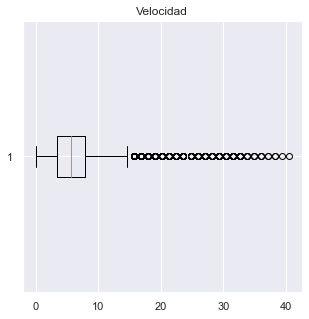

In [64]:
velo = np.array(data['Speed'])
boxplot(velo,'Velocidad')

#### KDE

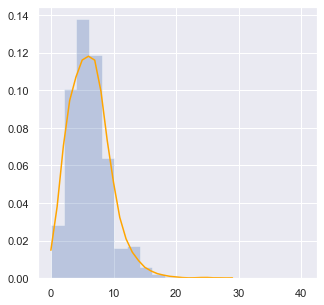

In [65]:
x_grid = np.arange(0,30)
kde = kde_statsmodels_m(velo)
plt.plot(x_grid, kde(x_grid),c='orange')
plt.hist(velo, bins=20, fc='b', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#### Distribuciones

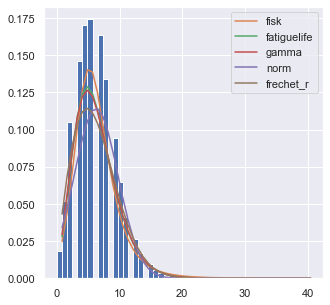

In [66]:
distribucion, params = distribuciones(velo) 

#### Prueba Q_Q

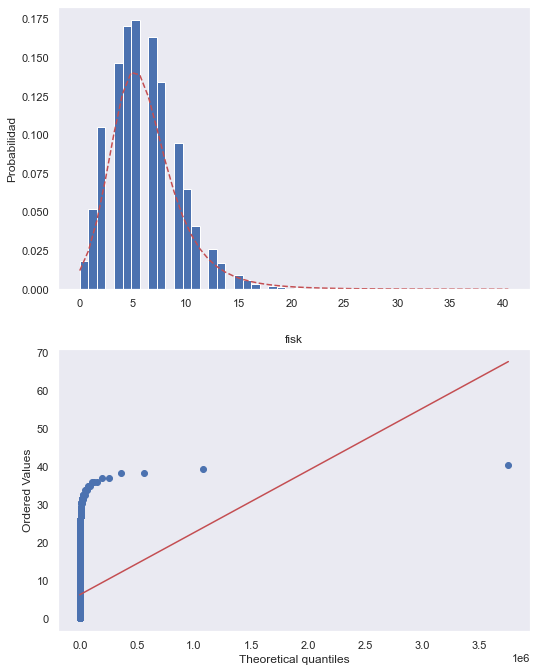

In [67]:
pruebaq_q(velo,'fisk')

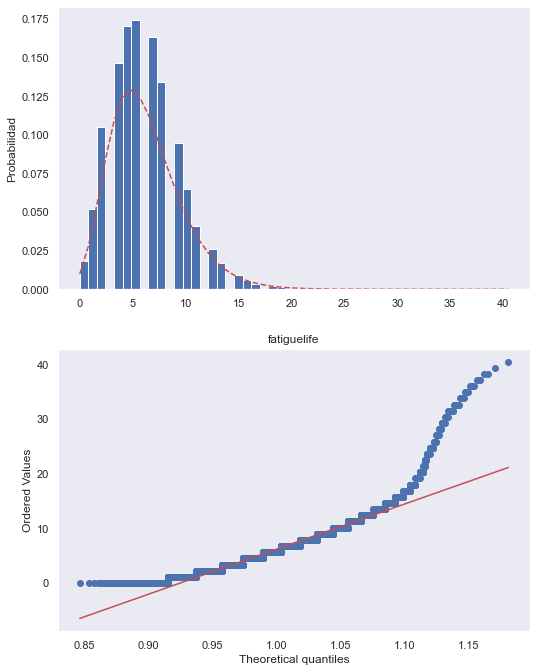

In [68]:
pruebaq_q(velo,'fatiguelife')

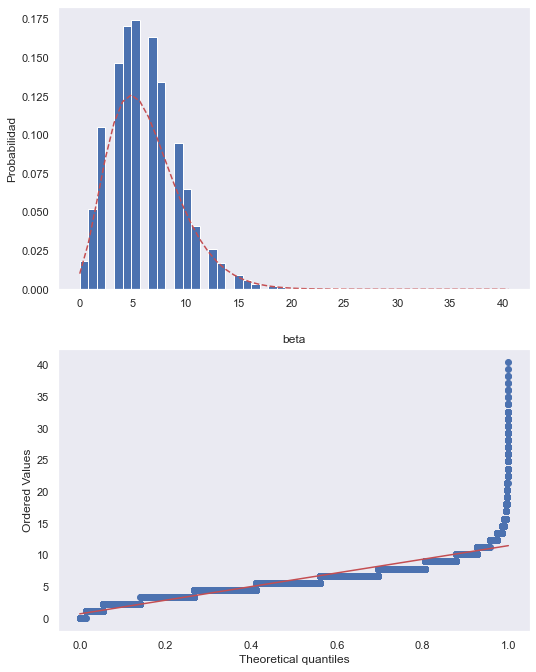

In [69]:
pruebaq_q(velo,'beta')

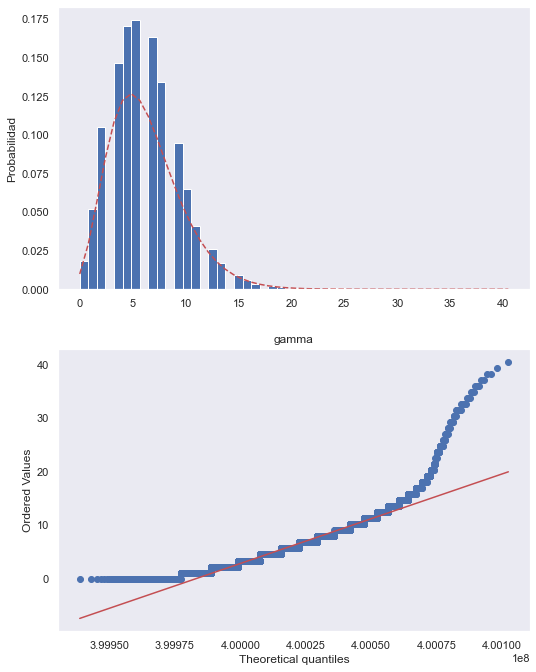

In [70]:
pruebaq_q(velo,'gamma')

#### Prueba Kolmogorov-Smirnov

In [71]:
kolmogorov(velo,'fatiguelife') # prueba de kolmogrov 

KstestResult(statistic=0.08384299469403761, pvalue=2.4462908852503942e-200)

In [72]:
kolmogorov(velo,'beta') # prueba de kolmogrov 

KstestResult(statistic=0.08116566802952946, pvalue=9.329704642733676e-188)

In [73]:
kolmogorov(velo,'gamma') # prueba de kolmogrov 

KstestResult(statistic=0.08271439012502163, pvalue=5.522727441454002e-195)

#### Prueba Chi Cuadrada

Chi cuadrado teórico:  131341.2938978557
Chi cuadrado stats:  Power_divergenceResult(statistic=131341.2938978557, pvalue=0.0)
Estadístico de chi_cuadrado:  42.55696780429269
Media muestral =  30.381166666666672 
Desviación estándar muestral =  0.10675044453025602


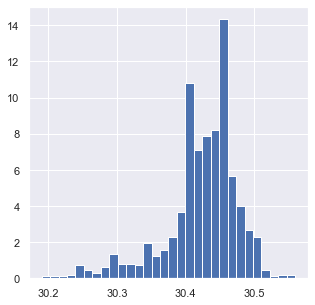

In [74]:
J1 = 30
y, x, _ = plt.hist(pres, bins = J1, density = True)
x = x[1:]
chi_cuadrada(distribucion,velo,x,y,0.95,params) # prueba de chicuadrada 

Se rechaza la hipotesis nula

#### Reducción de Varianza: Transformada inversa

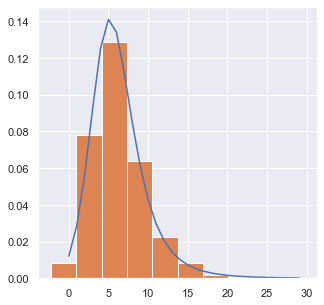

In [75]:
#encontramos parametros que se ajustan a nuestros datos
var_aleatorias_ti = distribucion.rvs(*params,1000)
plt.plot(np.arange(0,30),distribucion(*params).pdf(np.arange(0,30)))
plt.hist(var_aleatorias_ti,density=True);

#### Reducción de Varianza: Muestreo estratificado

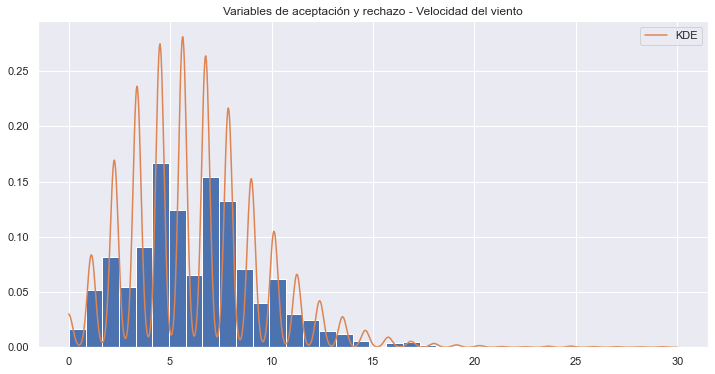

In [76]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(velo.reshape(-1, 1))
x_grid = np.linspace(0, 30, 1000)
pdf_velo = pdf(x_grid[:, None], model) # usando función pdf

plt.figure(figsize=(12,6))
var_aleatorias_me = red_var(velo,100000,pdf, lambda x: max(pdf_velo) * np.ones(len(x)), model) # usand pdf

plt.hist(var_aleatorias_me, 30, density=True)

plt.plot(x_grid, pdf_velo, alpha=1, label='KDE') # graficamos
plt.title('Variables de aceptación y rechazo - Velocidad del viento')
plt.legend()
plt.show()

#### Montecarlo: Media

In [77]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(velo.reshape(-1, 1))
x_grid = np.linspace(0, 30, 10)
pdf_velo = pdf(x_grid[:, None], model) # usando función pdf

montecarlo = [red_var(velo,100000,pdf, lambda x: max(pdf_velo) * np.ones(len(x)), model).mean() for i in range(100)] # usand pdf

In [78]:
np.mean(montecarlo)

6.286282199657597

#### Intervalo de confianza para la media

In [79]:
# reduccion de varianza transforamada inversa
intervalo_confianza(var_aleatorias_ti,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (6.022242498348147, 6.463707436654685)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (6.022509926973189, 6.463440008029643)
Media calculada 6.242974967501416
La media es 6.242974967501416 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


In [80]:
# reduccion de varianza muestreo estreatificado
intervalo_confianza(var_aleatorias_me,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (6.104487381077249, 6.507105890545146)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (6.1047312774890825, 6.506861994133312)
Media calculada 6.305796635811197
La media es 6.305796635811197 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


## Conclusión Nodo 4

Para este nodo no fue necesaria ningún ajuste, con el KDE tuvimos un buen ajuste ya que podemos ver en el histograma se ajusto bien. La mejor distribución fue Fisk de acuerdo a las distribuciones continuas. Lo verificamos con la prueba de cuantil cuantil, visualmente la mejor distribución fue Fatiguelife y beta. Luego basado en la prueba de kolmogrov-Smirnov se rechaza la hipótesis nula en todas. Pero luego verificamos la distribución que usamos para nuestra reducción de varianza por medio de la prueba de chi cuadrada, con un 95% de intervalo de confianza obtuvimos el chi cuadrado es 131341, el estadístico es 42.55 y nuestra media muestral es 30.08. Nuestro pvalue es menor .05 por lo que rechazamos la hipotesis nula. En la reducción de varianza obtuvimos una mejor distribución cuando realizamos el muestreo estratificado. Después obtenemos una media de 6.30 la cual esta dentro del intervalo de confianza por lo que podemos usar este variable. 


### Visualización de resultados de simulación

 Se toman en cuenta las correlaciones de cada variable con la radiación: 


##### Nodo_1: Temperatura
Se obtuvo una media en las simulaciones de 51°, entre más alta la temperatura la radiación solar sube. 

##### Nodo_2: Presión atmosférica/barométrica
Se obtuvo una media en las simulaciones de 30.37 Hg, entre más alta la humedad más radiación solar 

##### Nodo_3: Humedad
Se obtuvo una media en las simulaciones de -0.0349%. , entre menor humedad menor radiación solar. 

##### Nodo_4: Velocidad del viento
Se obtuvo una media en las simulaciones de 6.30 millas por viento, mayor velocidad mayor radiación solar. 

### Conclusiones

Simular y predecir la radiación solar es bastante útil ya que con ello pueden tomarse medidas y controlar sus efectos negativos. Encontramos que cada uno de los nodos es útil para predecir el nivel de radiación solar y al obtener la media de cada uno de los variables nos ayuda a obtener un panorama de lo que genera una alta radiación solar. En este proyecto logramos cumplir con todos nuestros objetivos y comprabamos que con nuestros variables seleccionados si podemos predecir la radiación solar. 

### Referencias

https://www.kaggle.com/dronio/SolarEnergy/version/1

http://www.ces.fau.edu/nasa/module-2/correlation-between-temperature-and-radiation.php

https://www.hindawi.com/journals/ijp/2019/8369231/